In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from scipy.optimize import curve_fit
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [60]:
Nivel_CO2 = [338.7,341.2,344.4,347.2,351.5,354.2,356.3,358.6,362.4,366.5,369.4,373.2,377.5,381.9,385.6]
Ano = [1980,1982,1984,1986,1988,1990,1992,1994,1996,1998,2000,2002,2004,2006,2008]

# Criando um data frame
Data = pd.DataFrame({
    "Ano": Ano,
    "Nível de CO2":Nivel_CO2})

In [61]:
Data

,Ano,Nível de CO2
0,1980,338.7
1,1982,341.2
2,1984,344.4
3,1986,347.2
4,1988,351.5
5,1990,354.2
6,1992,356.3
7,1994,358.6
8,1996,362.4
9,1998,366.5


<Axes: xlabel='Ano', ylabel='Nível de CO2'>

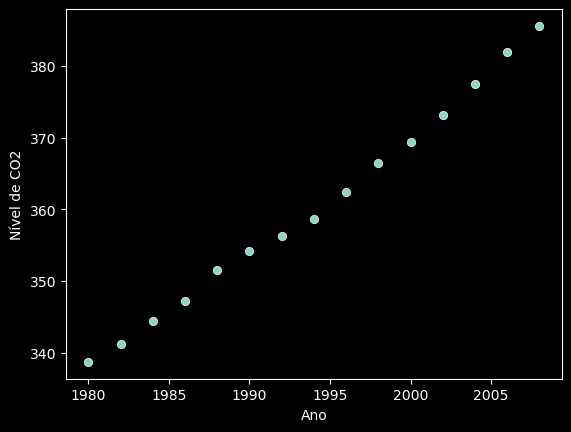

In [62]:
plt.style.use("dark_background")
# Plotando pontos com o seaborn
sns.scatterplot(Data, x="Ano", y="Nível de CO2",)

Equação da reta: y =  1.6543 * x + -2938.0724 
MAE = 0.9274920634920742
REMSE = 1.0865468820921633
R² = 0.9942555669951424


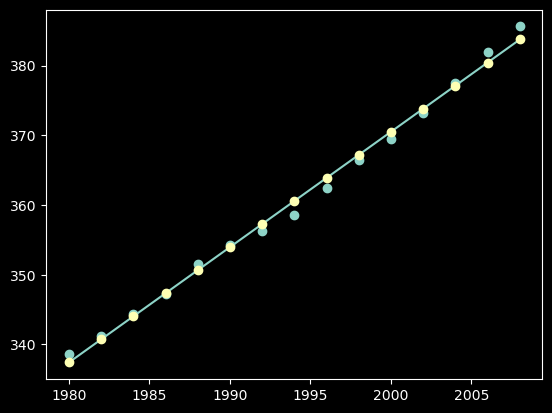

In [63]:
# Realizando uma regresão linera com os dados onde
"""
slope: inclinação da reta (quanto o Ano varia quando o Nível de CO2 aumenta 1 unidade).
intercept: valor do Ano quando Nível de CO2 = 0.
r_value: coeficiente de correlação de Pearson (força da relação linear).
r_value² (R²): proporção da variação explicada pelo modelo.
p_value: teste de significância (se a relação é estatisticamente significativa).
std_err: erro padrão da estimativa do slope.
"""

slope,intercept,rvalue,pvalue,stderr = linregress(Data["Ano"],Data["Nível de CO2"])

x = Data["Ano"]
y = slope*x + intercept
MAE = mean_absolute_error(Data["Nível de CO2"],y)
REMSE = root_mean_squared_error(Data["Nível de CO2"],y)
R2 = r2_score(Data["Nível de CO2"],y)
Lista = [MAE,REMSE,R2]

print(f"Equação da reta: y =  {slope:.4f} * x + {intercept:.4f} ")

for i in range(len(Lista)):
    Nome = ["MAE","REMSE","R²"]
    print(f"{Nome[i]} = {Lista[i]}")

plt.plot(x,y)
plt.plot(x,y,"o")
plt.scatter(Data["Ano"],Data["Nível de CO2"])

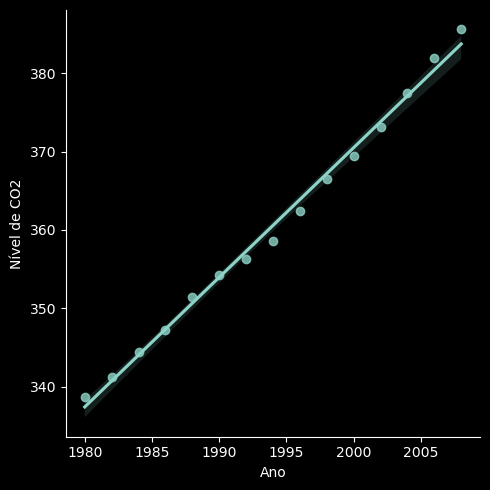

In [64]:
sns.lmplot(Data, x="Ano", y="Nível de CO2")

Equação da reta: y = 1.6543*x + -2938.0724
MAE = 0.9274920793879498
REMSE = 1.0865468820921316
R² = 0.9942555669951427


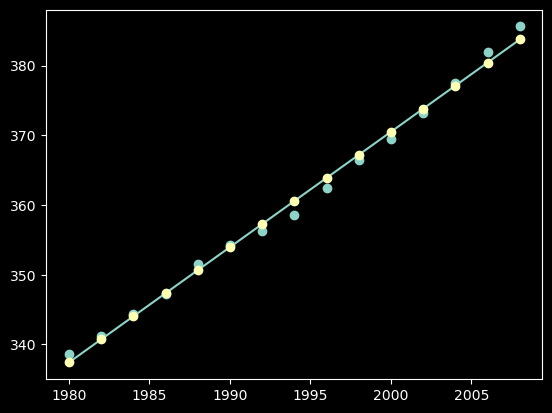

In [65]:
# Regressão com o curve_fit

# Definindo o Modelo
Model = lambda t,a,b: a*t + b

"""
popt: parâmetros ajustados.
pcov: matriz de covariância dos parâmetros (a diagonal tem a variância de cada parâmetro, 
então np.sqrt(np.diag(pcov)) dá o erro padrão dos parâmetros)."""
                                             
popt,pcov = curve_fit(Model,Data["Ano"],Data["Nível de CO2"])

x = Data["Ano"]
y = Model(x,*popt)


MAE = mean_absolute_error(Data["Nível de CO2"],y)
REMSE = root_mean_squared_error(Data["Nível de CO2"],y)
R2 = r2_score(Data["Nível de CO2"],y)
Lista = [MAE,REMSE,R2]

print(f"Equação da reta: y = {popt[0]:.4f}*x + {popt[1]:.4f}")

for i in range(len(Lista)):
    Nome = ["MAE","REMSE","R²"]
    print(f"{Nome[i]} = {Lista[i]}")

plt.plot(x,y)
plt.plot(x,y,"o")
plt.scatter(Data["Ano"],Data["Nível de CO2"])